<a href="https://colab.research.google.com/github/Farah-Saleem91/Prediction-of-product-sales/blob/main/Copy_of_prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Done by Farah Saleem





##Project Overview


##Load and inspect Data

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fname = ('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#1) How many rows and columns?
#rows = 8523, columns = 12
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Clean Data


In [5]:


#2) What are the datatypes of each variable?
#float = 4 (Item_Weight ,Item_Type,Item_MRP   , Item_Outlet_Sales  )
float_COLS = df.select_dtypes('float').columns
print(f' float columns is {float_COLS}')
object_cols = df.select_dtypes('object').columns
print(f' object columns is {object_cols}')
int_cols = df.select_dtypes('int64').columns
print (f'int cols is {int_cols}')

#dtypes: float64(4), int64(1), object(7)


 float columns is Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')
 object columns is Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
int cols is Index(['Outlet_Establishment_Year'], dtype='object')


In [6]:
#3) Are there duplicates? If so, drop any duplicates.
dfDupliates= df.duplicated()
#dfDupliates.sum()
# Count the duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#4) Identify missing values.
missingValues = df.isna()
missingValues.sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
#5) Address the missing values by using a placeholder value.
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [9]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,5203
Small,2388
High,932


In [10]:
#df['Item_Weight'].mean()= 12.85
#df['Item_Weight'] = df['Item_Weight'].fillna(12.85)
df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


In [11]:

df['Item_Weight'].median()

12.6

In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna(12.6)
df['Item_Weight'].value_counts()

,count
Item_Weight,
12.600,1516
12.150,86
17.600,82
13.650,77
11.800,76
...,...
8.920,2
6.520,1
9.420,1


In [13]:
#6) Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [14]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so tha are consistent).
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [16]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [17]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [18]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
numric_COLS = df.select_dtypes('number').columns
numric_COLS


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


###Exploratory Data Analysis

In [20]:
#Histograms to view the distributions of numerical features in your dataset.

import matplotlib.pyplot as plt
import seaborn as sns



Text(0.5, 1.0, 'Count for Item Weight')

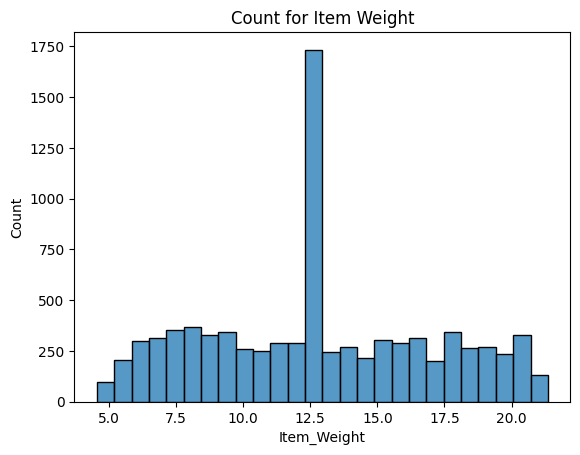

In [21]:

ax1= sns.histplot(data = df , x ='Item_Weight')
ax1.set_title('Count for Item Weight')


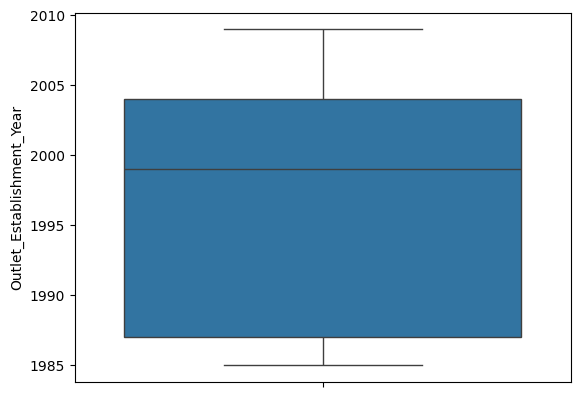

In [22]:
#Boxplots to view statistical summaries of numerical features in your dataset.

ax2= sns.boxplot(data = df , y= 'Outlet_Establishment_Year')

/tmp/ipython-input-2338430206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3= sns.countplot(data = df , x = 'Item_Fat_Content' , palette = 'crest')


Text(0.5, 1.0, 'Count for Item_Fat_Content')

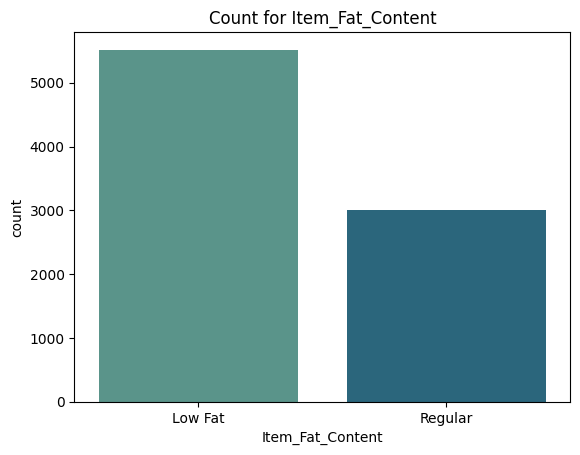

In [23]:
#Countplots to view the frequency of each class of categorial features in your dataset.
ax3= sns.countplot(data = df , x = 'Item_Fat_Content' , palette = 'crest')
ax3.set_title('Count for Item_Fat_Content')

/tmp/ipython-input-2368160390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data = df , x = 'Item_Type', order= val_counts.index , palette= 'rocket')
/tmp/ipython-input-2368160390.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


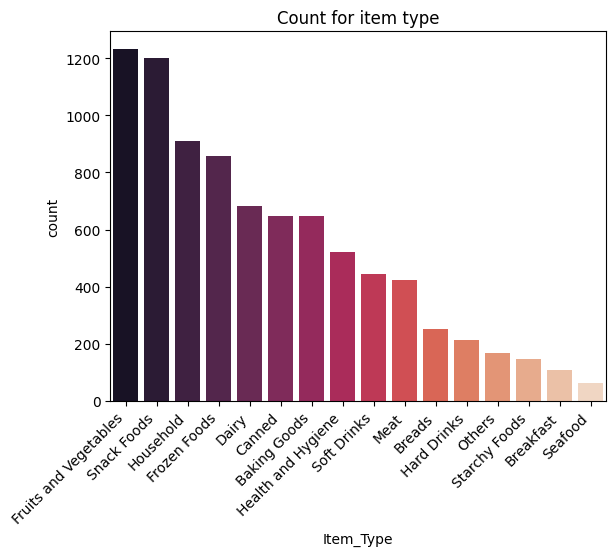

In [24]:
val_counts = df ['Item_Type'].value_counts()
val_counts.index
ax=sns.countplot(data = df , x = 'Item_Type', order= val_counts.index , palette= 'rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Count for item type')
plt.show()

/tmp/ipython-input-118318648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5=sns.countplot(data = df , x = 'Outlet_Identifier', palette= 'rocket')
/tmp/ipython-input-118318648.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


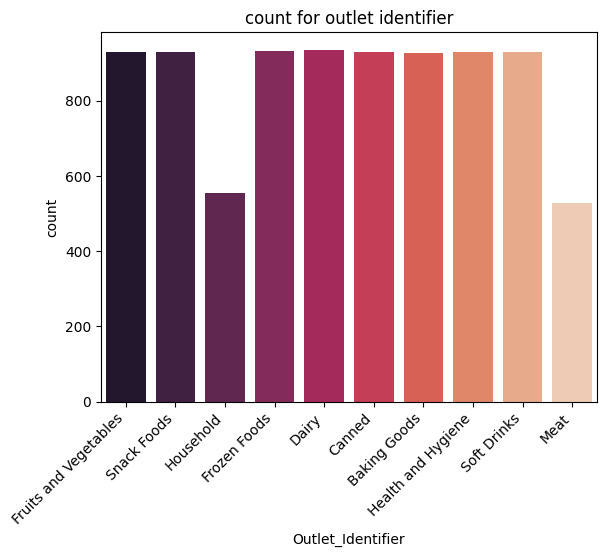

In [25]:
#Outlet_Identifier
ax5=sns.countplot(data = df , x = 'Outlet_Identifier', palette= 'rocket')
ax5.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax5.set_title('count for outlet identifier')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

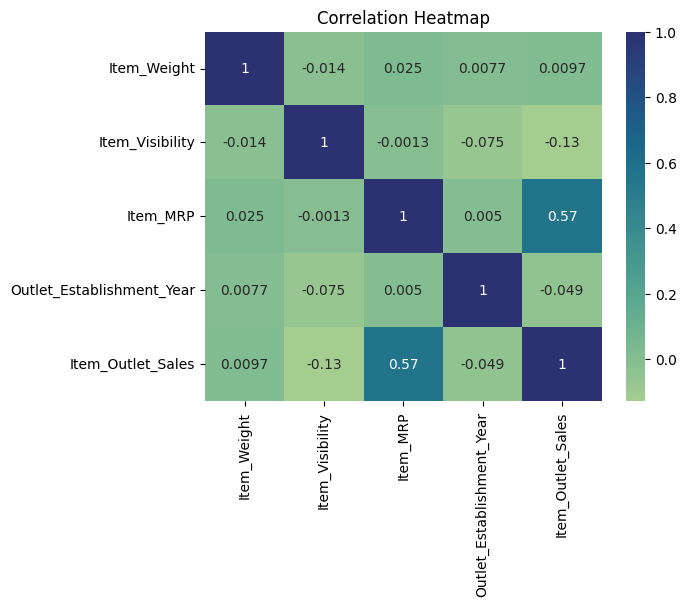

In [26]:
#Heatmap to view the correlation between features.
corr = df.corr(numeric_only = True)
corr.round(2)
ax7= sns.heatmap(corr , cmap='crest' , annot = True)
ax7.set_title('Correlation Heatmap')

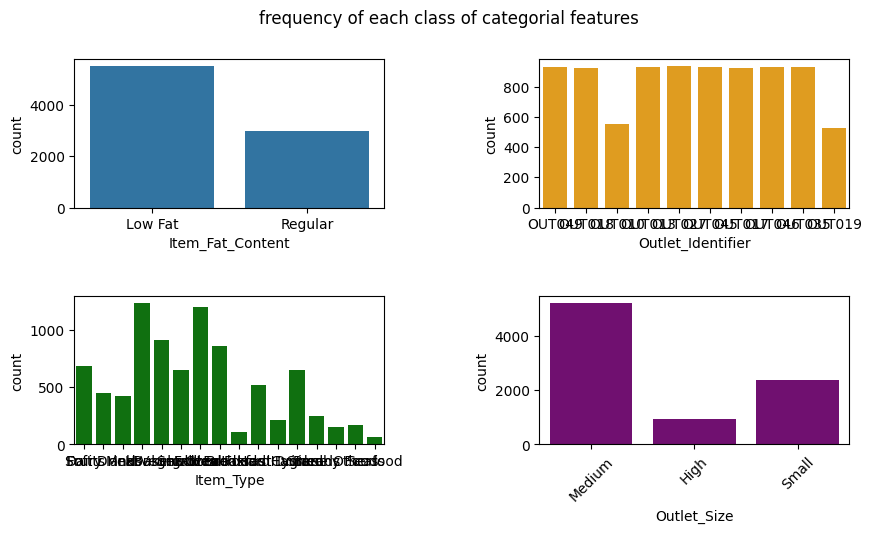

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,5))

sns.countplot(data = df , x ='Item_Fat_Content', ax=axes[0,0])
#ax[0,0].set_title('Count for Item Weight')

sns.countplot(data = df , x ='Item_Type', ax=axes[1,0], color='green')
plt.xticks(rotation=45)
#ax[1,0].set_title('Count for Item Weight')

sns.countplot(data = df , x ='Outlet_Size', ax=axes[1,1], color='purple')
#ax[1,1].set_title('Item_MRP')
plt.xticks(rotation=45)
sns.countplot(data = df , x ='Outlet_Identifier', ax=axes[0,1], color = 'orange')
plt.xticks(rotation=45)

fig.suptitle('frequency of each class of categorial features')
#fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace= 0.6)

###Feature Inspection
